In [1]:
print("Hello Kavin")

Hello Kavin


In [3]:
%pip --version

pip 24.0 from f:\APPS\Python\Lib\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at f:\apps\python\lib\site-packages\ply-3.11-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at f:\apps\python\lib\site-packages\python_dateutil-2.9.0.post0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at f:\apps\python\lib\site-packages\rule_engine-4.5.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at f:\apps\python\lib\site-packages\six-1.16.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [6]:
import os 
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path= os.path.join(curr_dir,"datasets","Valid")

Current Dir  b:\Internship\Potato project


In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [9]:
training_set.class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [11]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
# avoid overfitting of neurons

cnn.add(tf.keras.layers.Flatten())
# convert 2d to 1d vector form of img

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

f:\APPS\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


29/29 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.9428 - loss: 0.1266 - val_accuracy: 0.9367 - val_loss: 0.1546
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.8887 - loss: 0.2836 - val_accuracy: 0.9133 - val_loss: 0.1978
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.9422 - loss: 0.1518 - val_accuracy: 0.9433 - val_loss: 0.1382
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.9267 - loss: 0.1773 - val_accuracy: 0.9400 - val_loss: 0.1522
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.9687 - loss: 0.0774 - val_accuracy: 0.9533 - val_loss: 0.1110
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.9858 - loss: 0.0493 - val_accuracy: 0.9533 - val_loss: 0.1083
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9788 - loss: 0.0427 - val_accuracy: 0.9200 - val_loss: 0.1626
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.9701 - loss: 0.0793 - val_accuracy: 0.9467 - val_loss: 0.

In [18]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 918ms/step - accuracy: 0.9895 - loss: 0.0365
Training accuracy 0.9866666793823242


In [19]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 833ms/step - accuracy: 0.9494 - loss: 0.1812
Validation accuracy 0.949999988079071


In [20]:
cnn.save('trained_potato_plant_disease_model.keras')

In [21]:
training_history.history

{'accuracy': [0.9599999785423279,
  0.8999999761581421,
  0.9355555772781372,
  0.9411110877990723,
  0.9722222089767456,
  0.9844444394111633,
  0.9788888692855835,
  0.9811111092567444,
  0.9833333492279053,
  0.992222249507904],
 'loss': [0.10078638792037964,
  0.2573505640029907,
  0.16430269181728363,
  0.14771497249603271,
  0.07557295262813568,
  0.042295124381780624,
  0.04591008648276329,
  0.06646616756916046,
  0.03719156235456467,
  0.023093782365322113],
 'val_accuracy': [0.9366666674613953,
  0.9133333563804626,
  0.9433333277702332,
  0.9399999976158142,
  0.95333331823349,
  0.95333331823349,
  0.9200000166893005,
  0.9466666579246521,
  0.95333331823349,
  0.949999988079071],
 'val_loss': [0.15460547804832458,
  0.19776469469070435,
  0.13822297751903534,
  0.15224674344062805,
  0.11103998869657516,
  0.10834990441799164,
  0.16260983049869537,
  0.12103768438100815,
  0.10668294131755829,
  0.17064860463142395]}

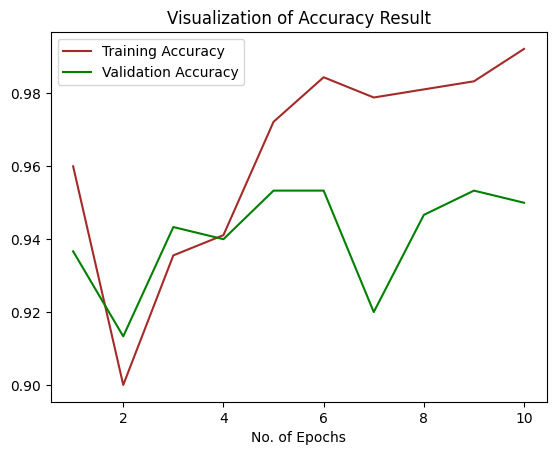

In [22]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='brown', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='green', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()